In [1]:
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os

filename = 'BCS_aligned_sorted'
filenames_total = glob.glob(filename+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

filenames_color = []
for image in filenames_total:
    if image.endswith('_C.tif'):
        filenames_color.append(image)
#print(filenames)


for cow_dir in glob.glob(filename+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace('BCS_aligned_sorted', 'BCS_sorted_resized'))
    except:
        pass
for cow_dir in glob.glob(filename+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace('BCS_aligned_sorted', 'BCS_sorted_resized'))
    except:
        pass


for image_name in filenames_depth:
    if image_name.endswith('_D.tif'):
        img = imageio.imread(image_name)
        if np.shape(img)[1] == 640:
            imageio.imwrite(str(image_name).replace('BCS_aligned_sorted', 'BCS_sorted_resized'), img, 'TIFF')
        if np.shape(img)[1] == 848:
            new_img = img[:, 104:-104]
            imageio.imwrite(str(image_name).replace('BCS_aligned_sorted', 'BCS_sorted_resized'), new_img, 'TIFF')

for image_name in filenames_color:
    if image_name.endswith('_C.tif'):
        img = imageio.imread(image_name)
        img_HSI = skimage.color.rgb2hsv(img)
        imageio.imwrite(str(image_name).replace('BCS_aligned_sorted', 'BCS_sorted_resized'), img_HSI, 'TIFF')
 

# temp_max_vec = [0, 0, 0, 0, 0, 0]
# temp_max = 0
# for img_name in filenames:
#     if img_name.endswith('_D.tif'):
#         temp_max = np.max(imageio.imread(img_name))
#     if (temp_max >= temp_max_vec[0]) and (temp_max < 10000):
#         temp_max_vec[5] = temp_max_vec[4]
#         temp_max_vec[4] = temp_max_vec[3]
#         temp_max_vec[3] = temp_max_vec[2]
#         temp_max_vec[2] = temp_max_vec[1]
#         temp_max_vec[1] = temp_max_vec[0]
#         temp_max_vec[0] = temp_max

# print(temp_max_vec)

In [3]:
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os
from astropy.io import fits
import pyfits 

C:\Users\zacha\anaconda3\lib\site-packages\pyfits\__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',


In [4]:
filename = 'BCS_sorted_resized'
filenames_total = glob.glob(filename+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

filenames_color = []
for image in filenames_total:
    if image.endswith('_C.tif'):
        filenames_color.append(image)



for i in range(0, len(filenames_color)):
    for j in range(i, len(filenames_depth)):
        if (os.path.basename(filenames_color[i][:-len('_C.tif')-1])==os.path.basename(filenames_depth[j][:-len('_C.tif')-1])) and (filenames_color[i][len('BCS_sorted_resized/4/'):-len(os.path.basename(filenames_color[i]))-1]==filenames_depth[j][len('BCS_sorted_resized/4/'):-len(os.path.basename(filenames_depth[j]))-1]):
            temp_filename = filenames_color[i].replace('BCS_sorted_resized', 'BCS_sorted_HDV')
            temp_filename = temp_filename.replace('C.tif', 'HDV.fits')
            img_HSV = imageio.imread(filenames_color[i])
            try:
                img_depth = imageio.imread(filenames_depth[j])
                img_depth[img_depth>2500] = 2500
                # img_depth = img_depth/np.max(img_depth)*255
            except:
                print(filenames_depth[j])
                break
            img_HSV[:, :, 1] = img_depth
            try:
                os.mkdir('BCS_sorted_HDV\\'+filenames_color[i][len('BCS_sorted_resized/'):-len(os.path.basename(filenames_color[i]))-1])
            except:
                pass
            hdu = fits.PrimaryHDU((img_HSV*255).astype('uint8'))
            hdu.writeto(temp_filename, output_verify='silentfix', overwrite=True)

            #imageio.imwrite(temp_filename, (img_HSV*255).astype('uint8'), 'TIFF')
print(np.max(img_HSV))

2500.0


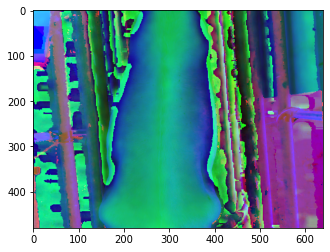

In [14]:
from astropy.io import fits
#fits_image_filename = fits.util.get_testdata_filepath('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits')


image_data = fits.getdata('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits', ext=0)  # assume the first extension is an image


with fits.open('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits') as img: # read in fits image
    img.verify('silentfix')
    img = img[0].data
    plt.imshow(img)

In [15]:
hdu = fits.PrimaryHDU(np.zeros((640, 480, 3)))
hdu.writeto('placeholder.fits', output_verify='silentfix', overwrite=True)

2586.0
252


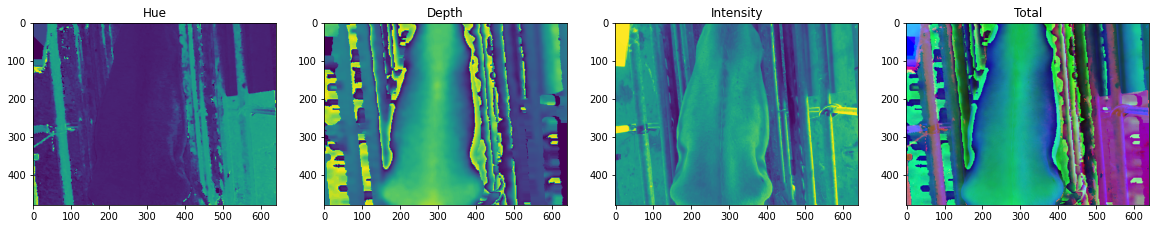

In [28]:
print(np.max(img_HSV))

img = (imageio.imread('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.tif')*255).astype('uint8')

plt.figure(figsize=(20,20))
plt.subplot(1, 4, 1)
plt.imshow(img[:, :, 0])
plt.title('Hue')
plt.subplot(1, 4, 2)
plt.imshow(img[:, :, 1])
plt.title('Depth')
plt.subplot(1, 4, 3)
plt.imshow(img[:, :, 2])
plt.title('Intensity')
plt.subplot(1, 4, 4)
plt.imshow(img)
plt.title('Total')

print(np.max(img[:, :, 0]))
#print(filenames_color[i][len('BCS_sorted_resized/4/'):-len(os.path.basename(filenames_color[i]))-1])

9823
BCS_sorted\2\Cow_11\100_D.tif
['BCS_sorted\\2\\Cow_11\\', 'BCS_sorted\\2\\Cow_11_2\\', 'BCS_sorted\\2\\Cow_46\\', 'BCS_sorted\\2\\Cow_46_1\\', 'BCS_sorted\\2\\Cow_46_2\\', 'BCS_sorted\\2\\Cow_5\\', 'BCS_sorted\\2\\Cow_5_1\\', 'BCS_sorted\\3\\Cow_1\\', 'BCS_sorted\\3\\Cow_12\\', 'BCS_sorted\\3\\Cow_14\\', 'BCS_sorted\\3\\Cow_16_1\\', 'BCS_sorted\\3\\Cow_16_2\\', 'BCS_sorted\\3\\Cow_22_1_other_camera_says_23\\', 'BCS_sorted\\3\\Cow_26\\', 'BCS_sorted\\3\\Cow_4\\', 'BCS_sorted\\3\\Cow_42\\', 'BCS_sorted\\3\\Cow_47_1\\', 'BCS_sorted\\3\\Cow_48\\', 'BCS_sorted\\3\\Cow_4_1\\', 'BCS_sorted\\3\\Cow_53\\', 'BCS_sorted\\4\\Cow_10_1\\', 'BCS_sorted\\4\\Cow_13_1\\', 'BCS_sorted\\4\\Cow_15\\', 'BCS_sorted\\4\\Cow_17_maybe_16\\', 'BCS_sorted\\4\\Cow_19\\', 'BCS_sorted\\4\\Cow_2\\', 'BCS_sorted\\4\\Cow_20\\', 'BCS_sorted\\4\\Cow_21\\', 'BCS_sorted\\4\\Cow_23_1\\', 'BCS_sorted\\4\\Cow_24\\', 'BCS_sorted\\4\\Cow_27\\', 'BCS_sorted\\4\\Cow_27_1\\', 'BCS_sorted\\4\\Cow_29\\', 'BCS_sorted\\4\\Cow_30\

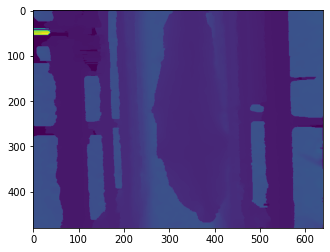

In [ ]:
img = imageio.imread(filenames_total[4001])

plt.imshow(img)
print(np.max(img))
print(filenames_total[1])

print(glob.glob(filename+'*\\*\\*\\'))